In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from tqts.quantizer.paa import PAA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_DIR = "../data/"
IMG_DIR = "../images/"

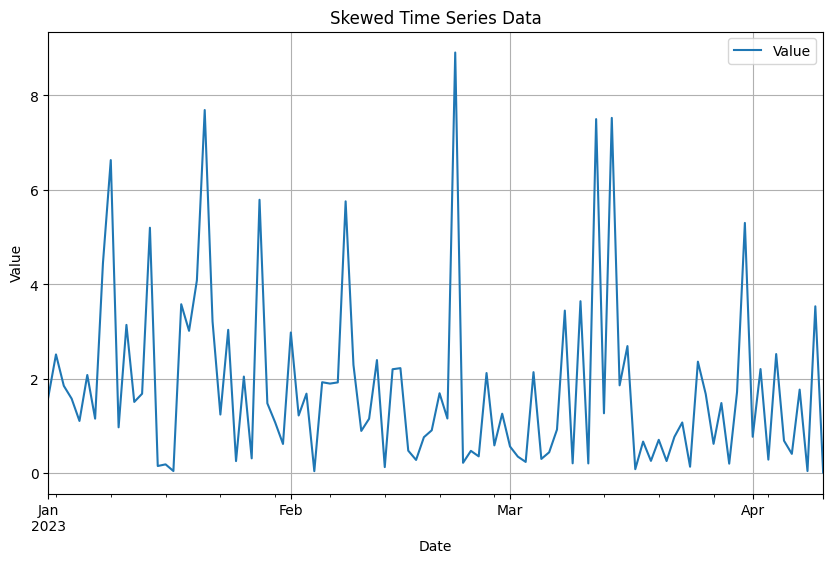

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Creating a time series with 100 data points, having a skew
np.random.seed(0)  # For reproducibility
data = np.random.exponential(scale=2.0, size=100)  # Exponential data for skew

# Creating a time index
time_index = pd.date_range('20230101', periods=100)

# Creating a DataFrame
time_series_data = pd.DataFrame(data, index=time_index, columns=['Value'])

# Plotting the time series data
plt.figure(figsize=(10, 6))
time_series_data.plot(ax=plt.gca())
plt.title('Skewed Time Series Data')
plt.ylabel('Value')
plt.xlabel('Date')
plt.grid(True)
plt.show()

In [ ]:
time_series_data['Value'].values

In [ ]:
air_passengers = pd.read_csv(DATA_DIR + 'AirPassengers.csv')
air_passengers['Month'] = pd.to_datetime(air_passengers['Month'])
air_passengers.set_index('Month', inplace=True)
air_passengers.head()

In [ ]:
def make_stationary(timeseries: pd.Series) -> pd.Series:
    """
    Apply differencing to make the time series stationary.
    """
    return timeseries.diff().dropna()

In [ ]:
air_passengers = make_stationary(air_passengers['#Passengers'])

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(air_passengers, model='multiplicative')
trend = result.trend
detrended = air_passengers['#Passengers'] / trend
detrended = detrended.dropna()
plt.plot(detrended)

In [ ]:
paa = PAA(window_size=15)
paa.fit(air_passengers['#Passengers'])
paa_segments = paa.transform(air_passengers['#Passengers'])

In [ ]:
plt.plot(air_passengers['#Passengers'])
plt.scatter(paa_segments)

In [ ]:
from sklearn.datasets import fetch_openml

bike_sharing = fetch_openml("Bike_Sharing_Demand", version=2, as_frame=True)
df = bike_sharing.frame

In [ ]:
average_week_demand = df.groupby(["weekday", "hour"])["count"].mean()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
average_week_demand.plot(ax=ax)

In [ ]:
paa.fit(average_week_demand)
paa_seg = paa.transform(average_week_demand)

In [ ]:
paa_seg

In [ ]:
# Let's correct the PAA implementation to have a single point per segment.
# np.random.seed(0)
time_series_length = 80  # Shorter length for a clearer plot similar to the provided image

# Generate a single random walk time series
single_time_series = np.random.randn(time_series_length) # np.cumsum(np.random.randn(time_series_length))

# Apply PAA to the single time series
n_paa_segments = 20  # Fewer segments for a clearer plot

def piecewise_aggregate_approximation_correct(ts, n_segments):
    """
    Perform Piecewise Aggregate Approximation on a time series, corrected to have a single point per segment.

    Parameters:
    - ts: The original time series (numpy array).
    - n_segments: The number of segments to divide the time series into.

    Returns:
    - paa_ts: The time series transformed by PAA with a single point per segment.
    """
    ts_len = len(ts)
    # Calculate the size of each segment
    segment_size = ts_len // n_segments
    # Initialize the PAA result
    paa_ts = np.zeros(n_segments)
    # Loop over each segment and calculate the mean
    for i in range(n_segments):
        start_idx = i * segment_size
        # Handle the last segment which might have a different size
        end_idx = start_idx + segment_size if i < n_segments - 1 else ts_len
        segment_mean = np.mean(ts[start_idx:end_idx])
        paa_ts[i] = segment_mean
    
    return paa_ts

# single_time_series_paa = piecewise_aggregate_approximation(single_time_series, n_paa_segments)
# Apply the corrected PAA to the single time series
single_time_series_paa_corrected = piecewise_aggregate_approximation_correct(single_time_series, n_paa_segments)

# We need to plot the PAA points such that they are centered in their respective segments
# Let's calculate the x positions for the PAA points
paa_x_positions = np.linspace(0, time_series_length, n_paa_segments, endpoint=False) + (time_series_length / n_paa_segments / 2)

# Plotting the corrected PAA result
plt.figure(figsize=(10, 4))

# Original time series
plt.plot(single_time_series, 'b--o', label='Original')

# PAA transformed time series (corrected)
plt.plot(paa_x_positions, single_time_series_paa_corrected, 'r-o', label='PAA')

# Adding vertical lines to show PAA window segments
for i in range(1, n_paa_segments):
    plt.axvline(x=i*time_series_length/n_paa_segments, color='g', linestyle=':', alpha=0.7)

plt.title('Piecewise Aggregate Approximation', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend()
# plt.show()
plt.savefig('paa.pdf', dpi=80, bbox_inches='tight')

In [4]:
from tqts.quantizer.kernel_sax import KernelSAX

Epoch 1, Boundaries delta: 2.6417922448, Codewords delta: 0.7775187965
Epoch 2, Boundaries delta: 0.3467816330, Codewords delta: 0.3086860052
Epoch 3, Boundaries delta: 0.2567969278, Codewords delta: 0.2122901643
Epoch 4, Boundaries delta: 0.1689556667, Codewords delta: 0.1283731909
Epoch 5, Boundaries delta: 0.1090655445, Codewords delta: 0.0742911481
Epoch 6, Boundaries delta: 0.0723580302, Codewords delta: 0.0581735301
Epoch 7, Boundaries delta: 0.0591724614, Codewords delta: 0.0571521027
Epoch 8, Boundaries delta: 0.0565666800, Codewords delta: 0.0438439753
Epoch 9, Boundaries delta: 0.0420466642, Codewords delta: 0.0371385052
Epoch 10, Boundaries delta: 0.0364859908, Codewords delta: 0.0396441312
Epoch 11, Boundaries delta: 0.0403112512, Codewords delta: 0.0336296613
Epoch 12, Boundaries delta: 0.0347929541, Codewords delta: 0.0310191804
Epoch 13, Boundaries delta: 0.0324406502, Codewords delta: 0.0296362065
Epoch 14, Boundaries delta: 0.0308051641, Codewords delta: 0.0276089798
E

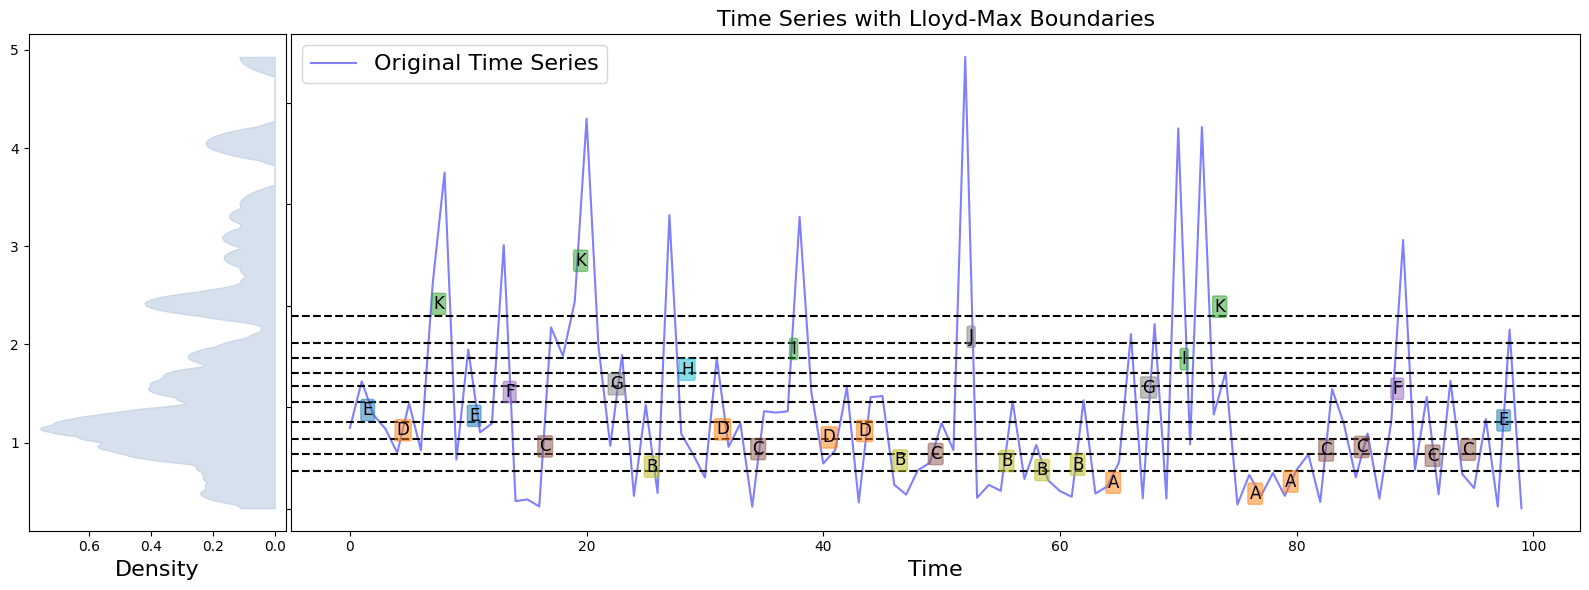

In [5]:
kernel_sax = KernelSAX(kernel='epanechnikov', n_alphabet=11, bandwidth=0.2, epochs=70, paa_window_size=3)
kernel_sax.fit(time_series_data['Value'].values, verbose=True)
kernel_sax.plot_with_boundaries(path=IMG_DIR, filename="kernel-sax.jpg")

In [ ]:
# Let's create the plot to match the provided example as closely as possible:
# - The distribution plot will be on the left side.
# - Use 6 SAX symbols.
# - The PAA lines will be color-coded based on their corresponding SAX symbol.
# - The SAX symbols will be bold and black.
# - The mirrored density plot will be on the left side of the time series plot.
from scipy.stats import norm
# Generate the time series again for consistency
np.random.seed(0)
time_series_length = 80
single_time_series = np.random.randn(time_series_length)
single_time_series_normalized = (single_time_series - np.mean(single_time_series)) / np.std(single_time_series)

def map_to_symbols(segment, breakpoints, symbols):
    for i, bp in enumerate(breakpoints):
        if segment < bp:
            return symbols[i]
    return symbols[-1]

# Apply PAA and SAX
n_paa_segments = 16  # Increase the number of PAA segments to match the example
n_sax_symbols = 6    # Number of SAX symbols
paa_ts = piecewise_aggregate_approximation_correct(single_time_series_normalized, n_paa_segments)
breakpoints = norm.ppf(np.linspace(1./n_sax_symbols, 1-1./n_sax_symbols, n_sax_symbols-1))
sax_symbols = 'abcdef'[:n_sax_symbols]
sax_ts = np.array([map_to_symbols(segment, breakpoints, sax_symbols) for segment in paa_ts])

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6), gridspec_kw={'width_ratios': [1, 3]}, sharey=True)

# Plot the mirrored density on the left subplot
sns.kdeplot(single_time_series_normalized, ax=ax1, vertical=True, shade=True)
ax1.set_xlim(ax1.get_xlim()[::-1])  # Flip the density plot to the left
ax1.set_yticklabels([])             # Hide y tick labels
ax1.set_xticklabels([])             # Hide x tick labels
ax1.set_ylabel('')                  # Hide y label

# Plot the time series and PAA segments on the right subplot
ax2.plot(single_time_series_normalized, label='Original Time Series')

# Plot the color-coded PAA segments and SAX symbols
colors = plt.cm.viridis(np.linspace(0, 1, n_sax_symbols))  # Colormap for PAA segments based on SAX symbols
for i, (paa_val, symbol) in enumerate(zip(paa_ts, sax_ts)):
    color = colors[sax_symbols.index(symbol)]
    paa_segment = [paa_val] * (time_series_length//n_paa_segments)
    ax2.plot(range(i*(time_series_length//n_paa_segments), (i+1)*(time_series_length//n_paa_segments)),
             paa_segment, color=color, lw=2)
    ax2.text((i + 0.5) * (time_series_length//n_paa_segments), paa_val, symbol,
             color='black', ha='center', fontweight='bold', fontsize=12, verticalalignment='bottom')

# Set horizontal lines for SAX symbols based on breakpoints
for bp in breakpoints:
    ax2.axhline(y=bp, color='gray', linestyle='--', linewidth=0.5)

# Hide the spines of the density plot
for spine in ax1.spines.values():
    spine.set_visible(False)

# Title and labels for the time series plot
ax2.set_title('SAX')
ax2.set_xlabel('Time')
ax2.set_ylabel('Normalized Value')
ax2.grid(True)

plt.tight_layout()
plt.show()
